# 1. 강의영상 

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. 자료

`-` 아래와 같은 자료를 상상하자. 

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv").iloc[:,:503]
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,-0.949314,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,4.861725,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,5.582663,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,3.919694,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.286851,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.002081,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,5.431050,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,0.088812,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,3.806388,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


In [80]:
df['employment_score'] = np.nan

In [83]:
df.to_csv("employment.csv",index=False)

In [77]:
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [78]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


- toeic0,toeic1,... 등은 토익과 유사한 새로운 시험들을 의미함. (실제 점수는 정수이겠지만 편의상 소수점으로 사용하였음)
- employmet_score는 회사에 내부적으로 정의된 채점기준표이며, 이 기준표에 의하여 일정점수 이상인 사람은 합격하고, 그렇지 않은 사람은 불합격한다고 가정함. 


`-` 비밀: 사실 저는 데이터를 아래의 공식에 따라서 만들었어요..

```
employment_score = toeic*1/100 + gpa*1.0 + random 
````

# 4. 잘못된 분석 

## A. 분석절차

`-` 데이터정리

**tr/test 분리**

In [58]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)

**(X,y), (XX,yy)**

In [39]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

`-` predictor 생성 

In [40]:
predictr = sklearn.linear_model.LinearRegression()

`-` 학습 

In [41]:
predictr.fit(X,y)

LinearRegression()

`-` 예측: 생략 

## B. 계수해석 및 평가

`-` 계수해석 

In [48]:
coefs = pd.Series(predictr.coef_.squeeze())
coefs.index = X.columns
coefs

gpa         0.036954
toeic      -0.002330
toeic0     -0.019881
toeic1     -0.012646
toeic2      0.011732
              ...   
toeic495   -0.004547
toeic496   -0.002172
toeic497    0.008067
toeic498   -0.001985
toeic499    0.009895
Length: 502, dtype: float64

- 실제계수값은 `토익*1/100`, `GPA*1.0`, 나머지 `toeic0`~`toeic499` 는 모두 계수값이 0임 
- 그러나 학습된 계수값은 그렇지 않음. 

`-` 평가: train/test score 계산 

In [49]:
predictr.score(X,y) 

1.0

- train 에서는 잘맞음 (퍼펙트)

In [50]:
predictr.score(XX,yy)

0.2377471553300865

- test 에서는 잘 맞지 않음 

# 5. 제대로 분석했다면? 

## A. `toeic`과 `gpa`가 유의미한 변수라는걸 눈치챘다면? 

`-` 분석절차수행

In [59]:
## step1: 데이터정리 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)
X = df_train[['toeic','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic','gpa']]
yy = df_test[['employment_score']]
## step2: predictor 생성 
predictr = sklearn.linear_model.LinearRegression()
## step3: 학습
predictr.fit(X,y)
## step4: 예측 -- 생략 

LinearRegression()

`-` 계수해석

In [57]:
predictr.coef_,predictr.intercept_

(array([[0.01044085, 1.01094838]]), array([-0.22326278]))

- 참값과 일치함 

`-` score도 괜찮음 

In [60]:
predictr.score(X,y)

0.9044685457186458

In [61]:
predictr.score(XX,yy)

0.9118120181317644

## B. 하다못해 `toeic0`과 `gpa`로 적합했다면? 

`-` 분석절차

In [63]:
## step1: 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)
X = df_train[['toeic0','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic0','gpa']]
yy = df_test[['employment_score']]
## step2: 
predictr = sklearn.linear_model.LinearRegression()
## step3: 적합 
predictr.fit(X,y)
## step4: 예측 - 생략 

LinearRegression()

`-` 계수해석

In [65]:
predictr.coef_,predictr.intercept_

(array([[0.01044732, 1.0211315 ]]), array([-0.24281626]))

- ture가 아님. 왜냐하면 (1) toeic0 대신에 toeic이 들어가야 했음 (2) toeic0에 대한 계수값은 원래 0임. (내가 그렇게 만듬)
- 왜? `toeic`변수가 할 역할을 `toeic0`이 대신하면 되니까.. 

`-` 평가

In [24]:
predictr.score(X,y)

0.9041564544857008

In [25]:
predictr.score(XX,yy)

0.913555796672601

# 6. Discussions

`-` 어렴풋한 감각: 쓸모없는 변수가 많이 있으면 오히려 모형의 적합도가 떨어진다. (규칙을 찾으면 안될것에서 규칙을 찾고있으니까 잘 될리가 없지)

`-` 쓸모없는 변수란 느낌이 드는 경우?

- 경우1: 진짜 쓸모 없는거.. (X1= 부먹/찍먹, X2= 민초/민초X) $\to$ 애초에 `X1`,`X2`을 보고 `y`를 맞출 생각이 들지 않어.. 
- 경우2: 실제론 쓸모 있는데, 대체자가 있는 경우. (X1= toeic, X2= 유사toeic) $\to$ `X1` 을 보고 `y`를 맞출 것 같은 생각이 들어, 그리고 `X2`를 보고 `y`를 맞출 것 같은 생각도 들어. 그런데 `X1`이랑 `X2`는 너무 비슷해

`-` 경우1, 경우2 모두 과대적합(overfitting)을 야기한다. 그리고 경우2와 같은 상황에서 발생하는 문제를 특별히 다중공선성이라고 칭한다. 

# 7. 다중공선성의 특징 

`-` 잘못된 분석을 다시 재현해보자. 

In [26]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)

In [27]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [28]:
predictr = sklearn.linear_model.LinearRegression()

In [29]:
predictr.fit(X,y)

LinearRegression()

`-` 계수를 해석해보자.

In [30]:
s = pd.Series(predictr.coef_.reshape(-1))
s.index = X.columns
s

gpa         0.036954
toeic      -0.002330
toeic0     -0.019881
toeic1     -0.012646
toeic2      0.011732
              ...   
toeic495   -0.004547
toeic496   -0.002172
toeic497    0.008067
toeic498   -0.001985
toeic499    0.009895
Length: 502, dtype: float64

In [35]:
s['toeic':'toeic499'].sum()

0.00991306443561532

In [32]:
#s['gpa0':'gpa499'].sum() + s['gpa']

`-` 반복해보자. 

In [33]:
import matplotlib.pyplot as plt

In [34]:
fig, ax = plt.subplots(3)
for i in range(3):
    df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=i)
    X = df_train.drop(['employment_score'],axis=1)
    y = df_train[['employment_score']]
    XX = df_test.drop(['employment_score'],axis=1)
    yy = df_test[['employment_score']]
    predictr = sklearn.linear_model.LinearRegression()
    predictr.fit(X,y)
    s = pd.Series(predictr.coef_.reshape(-1))
    s.index = X.columns
    toeic_coefs = s['toeic0':'toeic499'].tolist() + s[['toeic']].tolist() 
    ax[i].plot(toeic_coefs,color='C0')
    ax[i].set_title(f'coef of toeic, sum={sum(toeic_coefs):.4f}')
fig.tight_layout()

`-` 특징

1. 계수값이 매우 불안정하다. (돌릴때마다 다른값이 나옴) 
2. 계수값의 해석이 용이하지 않다. (어떤건 음의 계수값도 가짐)
3. 그렇지만 합치면 대충 합리적인 값이 나온다. 

# 첫번째 해법 Ridge

In [2669]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 데이터와 모델 준비
# X, y = your_data, your_target
# model = RandomForestClassifier()

# KFold 객체 생성 (K=5인 경우)
kfold = KFold(n_splits=2)

# # 교차 검증 수행 및 평가
# results = cross_val_score(model, X, y, cv=kfold)
# print("교차 검증 결과: ", results)
# print("평균 정확도: ", results.mean())


In [2670]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [2803]:
#model = sklearn.linear_model.Ridge(alpha=5e7)
model = sklearn.linear_model.Lasso(alpha=1)

In [2804]:
model.fit(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+02, tolerance: 3.353e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [2805]:
model.coef_.reshape(-1)[1:10]

array([-0.        , -0.        , -0.00415627,  0.        , -0.        ,
       -0.        , -0.        ,  0.00261782,  0.        ])

In [2806]:
model.score(X,y)

0.8550904881648445

In [2807]:
model.score(XX,yy)

0.8011921332196168

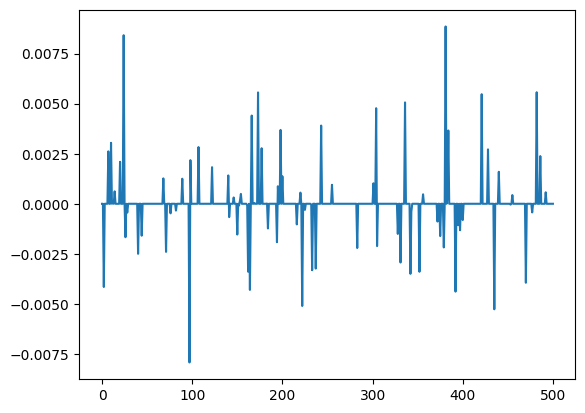

In [2808]:
plt.plot(model.coef_.reshape(-1)[1:])

In [2584]:
model.coef_.sum()

0.00972030356387148

In [2008]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=2)

In [1643]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [1280]:
model.fit(X,y)
model.score(X,y)

0.9774615288150512

In [1281]:
model.score(XX,yy)

0.6969784039924862

In [1282]:
cross_val_score(predictr,X,y,cv=kfold)

array([0.7111422 , 0.72722815])

In [1283]:
predictr.fit(X[175:],y[175:])
predictr.score(X[:175],y[:175])

0.7111421973146721

In [1284]:
predictr.fit(X[:175],y[:175])
predictr.score(X[175:],y[175:])

0.7272281502322167

# 7. Ridge, RidgeCV

# 8. Lasso, LassoCV

In [583]:
sklearn.linear_model.LassoCV??

Init signature:
sklearn.linear_model.LassoCV(
    *,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Source:        
class LassoCV(RegressorMixin, LinearModelCV):
    """Lasso linear model with iterative fitting along a regularization path.

    See glossary entry for :term:`cross-validation estimator`.

    The best model is selected by cross-validation.

    The optimization objective for Lasso is::

        (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

    Read more in the :ref:`User Guide <lasso>`.

    Parameters
    ----------
    eps : float, default=1e-3
        Length of the path. ``eps=1e-3`` means that
        ``alpha_min / alpha_max = 1e-3``.

    n_alphas : int, default=100
        Number of alphas along the regularization path.

    alphas : arr